In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 6
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/brettnaul/miniconda3/envs/deep/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [38]:
%run period_inverse.py 64 4 0 --no_train --model_type conv --even --filter_length 5 --sim_type period_inverse/even --lr 3e-4

train = np.arange(args.N_train); test = np.arange(args.N_test) + args.N_train
predict_conv = model.predict(Y[test])

[]
/Users/brettnaul/Dropbox/Documents/timeflow/keras_logs/period_inverse/even/conv_064_x4_3m04_drop0_f5
Loading /Users/brettnaul/Dropbox/Documents/timeflow/keras_logs/period_inverse/even/conv_064_x4_3m04_drop0_f5/weights.h5...


In [39]:
%run period_inverse.py 64 4 0 --no_train --model_type atrous --even --filter_length 5 --sim_type period_inverse/even --lr 3e-4

train = np.arange(args.N_train); test = np.arange(args.N_test) + args.N_train
predict_atrous = model.predict(Y[test])

[]
/Users/brettnaul/Dropbox/Documents/timeflow/keras_logs/period_inverse/even/atrous_064_x4_3m04_drop0_f5
Loading /Users/brettnaul/Dropbox/Documents/timeflow/keras_logs/period_inverse/even/atrous_064_x4_3m04_drop0_f5/weights.h5...


In [40]:
%run period_inverse.py 64 3 0 --no_train --model_type gru --even --sim_type period_inverse/even --lr 3e-4

train = np.arange(args.N_train); test = np.arange(args.N_test) + args.N_train
predict_gru = model.predict(Y[test])

[]
/Users/brettnaul/Dropbox/Documents/timeflow/keras_logs/period_inverse/even/gru_064_x3_3m04_drop0
Loading /Users/brettnaul/Dropbox/Documents/timeflow/keras_logs/period_inverse/even/gru_064_x3_3m04_drop0/weights.h5...


In [41]:
i = -1

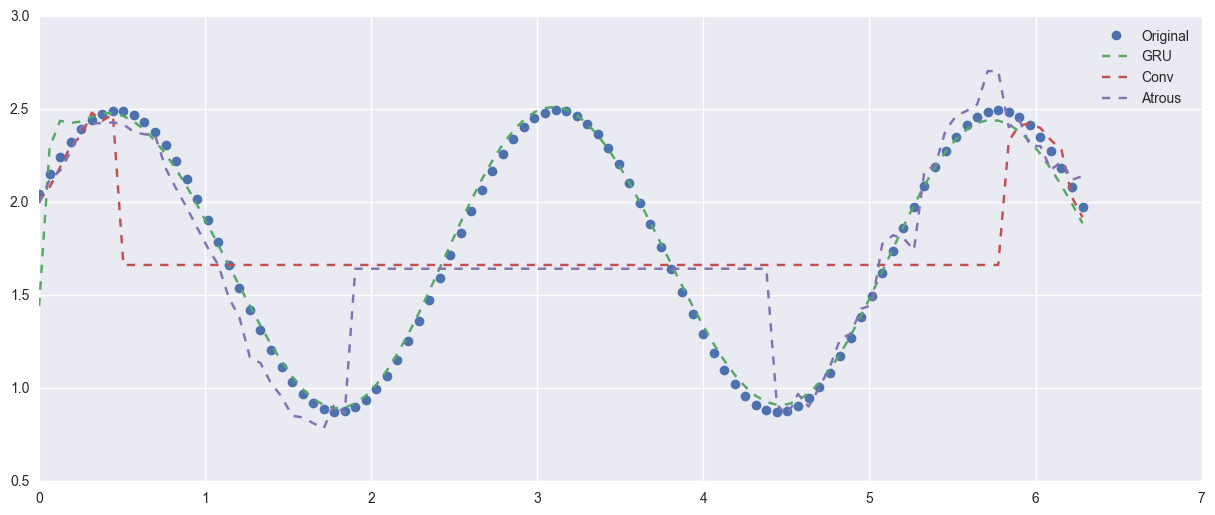

In [42]:
i += 1
if args.even:
    t = np.linspace(0, 2 * np.pi, args.n_max)
    x = X[test[i]].ravel()
else:
    t = X[test[i], :, 0].cumsum()
    x = X[test[i], :, 1]
plt.plot(t, x, 'o')

plt.plot(t, predict_gru[i], '--')
plt.plot(t, predict_conv[i], '--')
plt.plot(t, predict_atrous[i], '--')

plt.legend(['Original', 'GRU', 'Conv', 'Atrous'])